In [67]:
from google.colab import drive
drive.mount('/content/drive')
import sys
sys.path.append('/content/drive/MyDrive/파이토치')

from multiclass_functions1 import *
from torch import nn, optim
from torchvision import datasets, transforms
import torch
import numpy as np
import matplotlib.pyplot as plt

DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
print(DEVICE)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
cpu


In [68]:
BATCH_SIZE = 32
LR = 1e-3
EPOCH=5
criterion = nn.CrossEntropyLoss()
new_model_train = True
model_type = "CNN_deep"
dataset = "CIFAR10"
save_model_path = f"/content/drive/MyDrive/파이토치/results/{model_type}_{dataset}.pt"

In [69]:
transform = transforms.ToTensor()
train_DS = datasets.CIFAR10(root = "/content/drive/MyDrive/파이토치/data", train=True, download=True, transform=transform)
test_DS = datasets.CIFAR10(root = "/content/drive/MyDrive/파이토치/data", train=False, download=True, transform=transform)
train_DL = torch.utils.data.DataLoader(train_DS, batch_size=BATCH_SIZE, shuffle=True)
test_DL = torch.utils.data.DataLoader(test_DS, batch_size=BATCH_SIZE, shuffle=True)

In [70]:
print(train_DS)
print(test_DS)

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: /content/drive/MyDrive/파이토치/data
    Split: Train
    StandardTransform
Transform: ToTensor()
Dataset CIFAR10
    Number of datapoints: 10000
    Root location: /content/drive/MyDrive/파이토치/data
    Split: Test
    StandardTransform
Transform: ToTensor()


In [71]:
for x, y in train_DS:
    print(x.shape)
    print(y)
    break

torch.Size([3, 32, 32])
6


['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
{'airplane': 0, 'automobile': 1, 'bird': 2, 'cat': 3, 'deer': 4, 'dog': 5, 'frog': 6, 'horse': 7, 'ship': 8, 'truck': 9}
torch.Size([32, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([32, 32, 3])
tensor(2)
['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
bird


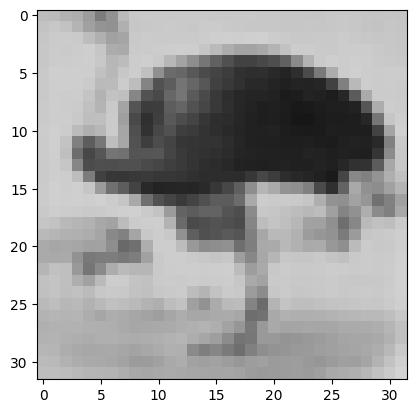

In [72]:
print(test_DS.classes)
print(test_DS.class_to_idx)
x_batch, y_batch = next(iter(test_DL))
print(x_batch.shape) # torch.Size([32, 3, 32, 32]): 개채행열
print(x_batch[0].shape)
print(x_batch[0].permute(1,2,0).shape)
plt.imshow(x_batch[0].permute(1,2,0)) # plt.imshow은 행열채 형식으로
print(y_batch[0])
print(test_DS.classes)
print(test_DS.classes[y_batch[0]])

In [73]:
x_batch, y_batch = next(iter(train_DL)) # 데이터 한 국자 # next(iter(train_DS)) 는 한장만 꺼내기 -> next(iter(x)) = "x에서 첫 번째 요소 꺼내기"
"""
ToTensor 의 역할
1. tensor로 바꾸고
2. 개채행열로 바꾸고 : 흑백이면 채 는 1, 칼라이면 3
3. 0 ~ 1 사이로 바꾸고 (int -> float)
"""
print(type(train_DS.data))
print(train_DS.data.shape)
print(train_DS.data.dtype)
print(train_DS.data[0][0][0][0])

print(type(x_batch))
print(x_batch.shape)
print(x_batch.dtype)
print(x_batch[0][0][0][0])

<class 'numpy.ndarray'>
(50000, 32, 32, 3)
uint8
59
<class 'torch.Tensor'>
torch.Size([32, 3, 32, 32])
torch.float32
tensor(0.3294)


In [74]:
# import torch
# import torch.nn as nn

# batch_size = 4
# features = 30

# bn = nn.BatchNorm1d(features)

# x = torch.randn(batch_size, features)  # 예: [4, 30]
# print(x)
# output = bn(x)  # 배치 정규화가 적용된 출력
# print(output)

# """
# - nn.BatchNorm1d(features):
#     - 1차원 feature 벡터(특성별) 배치 정규화 레이어를 생성
#     - 여기서 features=30은 특성의 개수
# - x:
#     - 무작위로 생성된 입력 텐서이며, 크기는 [batch_size, features] = [4, 30]
#     - 각 행은 하나의 샘플, 각 열은 하나의 특성(feature)을 의미
# - output = bn(x):
#     - 입력 x에 대해 배치 정규화 수행
#     - 배치 내 각 특성(feature)에 대해 평균과 분산을 계산하여 정규화
#     - 정규화된 값에 학습 가능한 스케일(γ)과 시프트(β) 파라미터가 적용되어 출력
# - 배치 정규화(Batch Normalization)의 주요 목적:
#     - 학습 과정에서 내부 활성화 값의 분포 변화(Internal Covariate Shift)를 줄여 학습 안정성과 속도를 향상
#     - 과적합 방지
# """


- nn.ReLU():
    - 활성화 함수 중 하나인 ReLU(Rectified Linear Unit)를 적용하는 레이어
    - 입력값이 0 이하일 때는 0을 출력하고, 0 이상일 때는 입력값을 그대로 출력
      즉, f(x) = max(0, x) 형태
    - 비선형성을 추가하여 신경망이 복잡한 함수도 학습할 수 있도록 도와줌
    - 계산이 간단하고, 기울기 소실 문제(vanishing gradient)를 완화하는 데 효과적


In [75]:
class MLP(nn.Module):
    def __init__(self, num_class):
        super().__init__()
        self.linear = nn.Sequential(
            nn.Linear(3*32*32, 30),
            nn.BatchNorm1d(30),
            nn.ReLU(),
            nn.Linear(30, num_class)
        )

    def forward(self, x):
        x = torch.flatten(x, start_dim=1)
        x = self.linear(x)
        return x

class MLP_shallow(nn.Module):
    def __init__(self, num_class):
        super().__init__()
        self.linear = nn.Sequential(
            nn.Linear(3*32*32, 100),
            nn.BatchNorm1d(100),
            nn.ReLU(),
            nn.Linear(100, num_class)
        )

    def forward(self, x):
        x = torch.flatten(x, start_dim=1)
        x = self.linear
        return x

class MLP_deep(nn.Module):
    def __init__(self, num_class):
        super().__init__()
        self.linear = nn.Sequential(
            nn.Linear(3*32*32, 75),
            nn.BatchNorm1d(75),
            nn.ReLU(),
            *[i for _ in range(13) for i in [nn.Linear(75,75), nn.BatchNorm1d(75), nn.ReLU()]],
            nn.Linear(75, num_class)
        )

    def forward(self, x):
        x = torch.flatten(x, start_dim=1)
        x = self.linear(x)
        return x

class CNN(nn.Module):
    def __init__(self, num_class):
        super().__init__()
        """
        입력 텐서 크기: [batch_size, 3, 32, 32]
            예: [32, 3, 32, 32]  → 배치 크기 32, RGB 이미지 32x32

        규칙:
        - Conv2d: 채널 수는 점점 늘리고, 커널 크기 3×3, padding=1로 출력 크기 유지
        - BatchNorm2d: Conv 연산 후 채널별 정규화로 학습 안정화
        - ReLU: 비선형성 부여 (음수 제거)
        - MaxPool2d(2): 공간 크기(가로/세로)를 절반으로 줄여 특성 압축

        반복 구조 예시:
        [Conv2d → BatchNorm2d → ReLU → MaxPool2d] ⨉ N

        conv1 블록:
        - nn.Conv2d(3, 8, kernel_size=3, padding=1)
            → 3채널 입력을 8채널로 변환 (출력 크기 유지: 32x32)
            → 출력: [batch_size, 8, 32, 32]

        - nn.BatchNorm2d(8)
            → 채널 정규화, 출력 동일: [batch_size, 8, 32, 32]

        - nn.ReLU()
            → 비선형 함수 적용

        - nn.MaxPool2d(kernel_size=2)
            → 공간 절반 축소: 32x32 → 16x16
            → 출력: [batch_size, 8, 16, 16]

        conv2 블록:
        - nn.Conv2d(8, 16, kernel_size=3, padding=1)
            → 채널 8 → 16, 공간 크기 유지: 16x16
            → 출력: [batch_size, 16, 16, 16]

        - nn.BatchNorm2d(16)
            → 채널 정규화

        - nn.ReLU()

        - nn.MaxPool2d(kernel_size=2)
            → 공간 절반 축소: 16x16 → 8x8
            → 출력: [batch_size, 16, 8, 8]

        - nn.Conv2d(입력채널, 출력채널, 커널크기) => 입력채널 = 이전 레이어의 출력채널 이어야 함!
        """
        self.conv1 = nn.Sequential(
            nn.Conv2d(3, 8, 3, padding=1),
            nn.BatchNorm2d(8),
            nn.ReLU()
        )
        self.Maxpool1 = nn.MaxPool2d(2)

        self.conv2 = nn.Sequential(
            nn.Conv2d(8, 16, 3, padding=1),
            nn.BatchNorm2d(16),
            nn.ReLU()
        )
        self.Maxpool2 = nn.MaxPool2d(2)

        self.conv3 = nn.Sequential(
            nn.Conv2d(16,32,3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU()
        )
        self.Maxpool3 = nn.MaxPool2d(2)
        self.fc = nn.Linear(32*4*4, num_class)

    def forward(self, x):
        """
        conv1 블록 통과 [32, 3, 32, 32] → [32, 8, 32, 32]
        Maxpool1 적용 [32, 8, 32, 32] → [32, 8, 16, 16]
        conv2 블록 통과 [32, 8, 16, 16] → [32, 16, 16, 16]
        Maxpool2 적용 [32, 16, 16, 16] → [32, 16, 8, 8]
        conv3 블록 통과 [32, 16, 8, 8] → [32, 32, 8, 8]
        Maxpool3 적용 [32, 32, 8, 8] → [32, 32, 4, 4]
        Flatten [32, 32, 4, 4] → [32, 512]
        fc 통과 [32, 512] → [32, num_class]
        최종 출력 반환
        """
        x = self.conv1(x)
        x = self.Maxpool1(x)
        x = self.conv2(x)
        x = self.Maxpool2(x)
        x = self.conv3(x)
        x = self.Maxpool3(x) # x.shape: [32, 32, 4, 4]
        x = torch.flatten(x, start_dim=1)
        x = self.fc(x)
        return x

class CNN_deep(nn.Module):
    def __init__(self, num_class):
        super().__init__()
        self.conv_block1 = nn.Sequential(
            nn.Conv2d(3,32,3,padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.Conv2d(32,32,3,padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU()
        )
        self.Maxpool1 = nn.MaxPool2d(2)

        self.conv_block2 = nn.Sequential(
            nn.Conv2d(32,64,3,padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.Conv2d(64,64,3,padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.Conv2d(64,64,3,padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU()
        )
        self.Maxpool2 = nn.MaxPool2d(2)

        self.conv_block3 = nn.Sequential(
            nn.Conv2d(64,128,3,padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.Conv2d(128,128,3,padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.Conv2d(128,128,3,padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU()
        )
        self.Maxpool3 = nn.MaxPool2d(2)

        self.classifier = nn.Sequential(
            nn.Linear(128*4*4, 512),
            nn.ReLU(),
            nn.Linear(512, num_class)
        )

    def forward(self, x):
        x = self.conv_block1(x)
        x = self.Maxpool1(x)
        x = self.conv_block2(x)
        x = self.Maxpool2(x)
        x = self.conv_block3(x)
        x = self.Maxpool3(x)
        x = torch.flatten(x, start_dim=1)
        x = self.classifier(x)
        return x

In [76]:
num_class = len(train_DS.classes)
model = globals()[model_type](num_class).to(DEVICE)
print(model)
x_batch, _ = next(iter(train_DL))
print(x_batch.shape)
print(model(x_batch.to(DEVICE)).shape)

CNN_deep(
  (conv_block1): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
  )
  (Maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv_block2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): BatchNorm2d(64, eps=1e-05, momentum=

Epoch: 1, train loss: 1.3851
--------------------
Epoch: 2, train loss: 0.8801
--------------------
Epoch: 3, train loss: 0.7000
--------------------
Epoch: 4, train loss: 0.5828
--------------------
Epoch: 5, train loss: 0.4985
--------------------


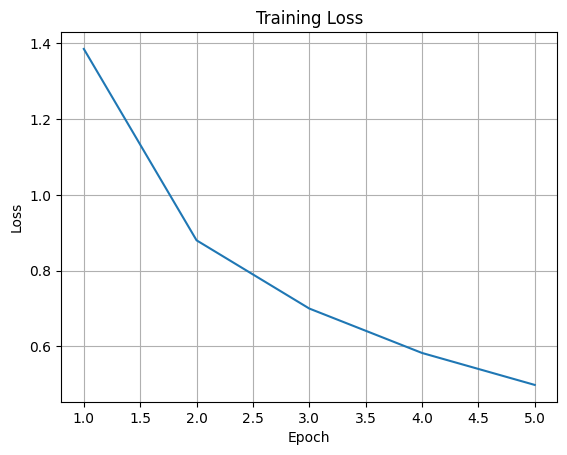

In [77]:
if new_model_train:
    optimizer = optim.Adam(model.parameters(), lr=LR)
    loss_history = Train(model, train_DL, criterion, optimizer, EPOCH)

    torch.save(model.state_dict(), save_model_path)

    plt.plot(range(1, EPOCH+1), loss_history)
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Training Loss")
    plt.grid()


In [78]:
load_model = globals()[model_type](num_class).to(DEVICE)
load_model.load_state_dict(torch.load(save_model_path, map_location=DEVICE))

<All keys matched successfully>

In [79]:
Test(load_model, test_DL)
print(count_params(load_model))

Test accuracy: 8060/10000 (80.6 %)
1527018


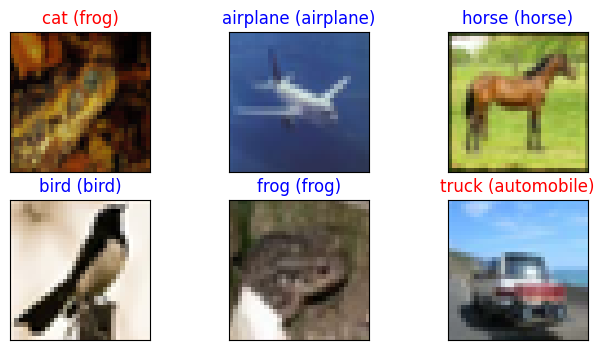

In [80]:
Test_plot(model, test_DL)

10
80.6


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'airplane'),
  Text(1, 0, 'automobile'),
  Text(2, 0, 'bird'),
  Text(3, 0, 'cat'),
  Text(4, 0, 'deer'),
  Text(5, 0, 'dog'),
  Text(6, 0, 'frog'),
  Text(7, 0, 'horse'),
  Text(8, 0, 'ship'),
  Text(9, 0, 'truck')])

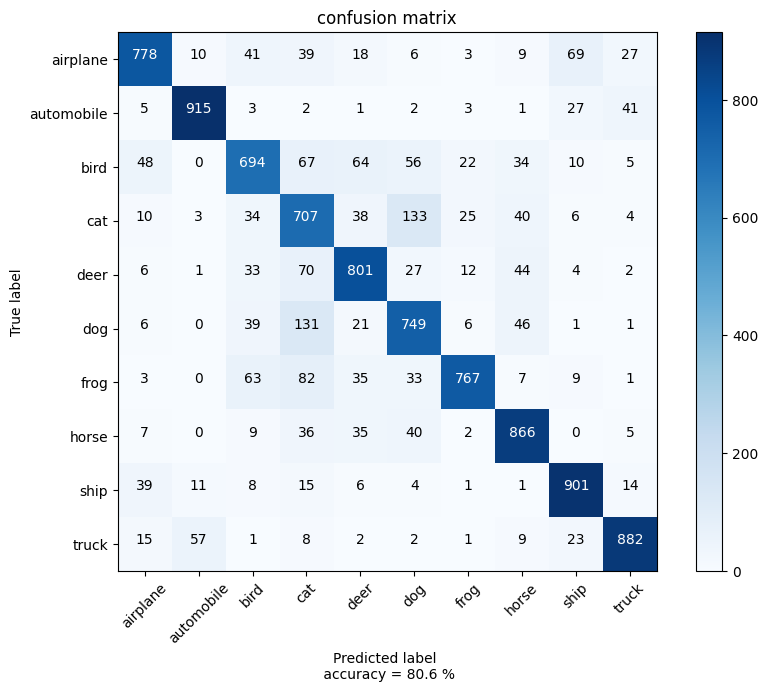

In [81]:
confusion = get_conf(load_model, test_DL)
plot_confusion_matrix(confusion, test_DL.dataset.classes)
plt.xticks(rotation=45)

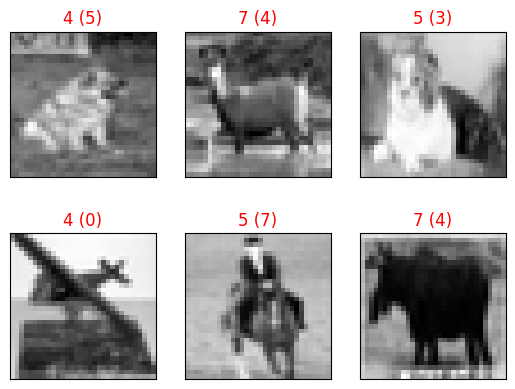

In [82]:
cnt = 0
load_model.eval()
with torch.no_grad():
    for x_batch, y_batch in test_DL:
        x_batch = x_batch.to(DEVICE)
        y_batch = y_batch.to(DEVICE)
        y_hat = load_model(x_batch)
        pred = y_hat.argmax(dim=1)

        """
        예측값(pred)과 실제값(y_batch)을 비교하여,
        서로 다른(=예측이 틀린) 위치에 True를 갖는 불리언 텐서 생성
        예: pred = tensor([1, 0, 2]), y_batch = tensor([1, 1, 2]) → false_idx = tensor([False, True, False])
        """
        false_idx = pred != y_batch

        """
        예측이 틀린 샘플들만 x_batch에서 선택
        false_idx가 True인 샘플만 첫 번째 차원(batch 차원)에서 선택하고,
        나머지 차원(예: 이미지의 채널, 높이, 너비)은 그대로 유지

        예시:
        x_batch.shape = (32, 1, 28, 28)일 경우
        false_idx.shape = (32,) → 예측이 틀린 샘플 위치만 True
        X_false.shape = (N_wrong, 1, 28, 28) → 예측이 틀린 N_wrong개 샘플만 추출
        """
        X_false = x_batch[false_idx, ...].to('cpu')
        pred_false = pred[false_idx, ...].to('cpu')
        Y_false = y_batch[false_idx, ...].to('cpu') # 틀린 샘플들에 대한 '정답' 라벨을 의미

        if X_false.shape[0] != 0:
            if cnt == 6:
                break
            for i in range(X_false.shape[0]):
                if cnt == 6:
                    break
                cnt += 1
                pred_class = pred_false[i].item()
                true_class = Y_false[i].item()
                plt.subplot(2, 3, cnt,xticks=[], yticks=[])
                """
                X_false[i, ...]	(1, 28, 28)	i번째 샘플 전체 (채널 포함)
                X_false[i, 0, ...]	(28, 28)	i번째 샘플의 첫 번째 채널(흑백 이미지 한 장)만 선택
                """
                plt.imshow(X_false[i,0,...], cmap='gray')
                plt.title(f"{pred_class} ({true_class})", color=("r"))
